<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_DerivacionEIntegracion_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [ ]:
#@title Librerías
import numpy as np
import pandas as pd
from scipy import optimize
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.integrate import trapz
from scipy.integrate import simpson
from scipy.integrate import quad
import sympy as sp


#1.Parte 1
1. En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación 


\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde r, es la resistencia del ciruito, i es la corriente. Suponga que medimos la corriente con varios valores de t y obtenemos:

t = 1.00, 1.01, 1.02, 1.03, 1.0

i = 3.10, 3.12, 3.14, 3.18, 3.24


donde t se mide en segundos, i se de en amper, la inductancia L es una constante de 0.98 herios, la resistencia es de 0.142 ohms. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente 
- Emplee un metodo calcular la derivada numérica. 





In [ ]:
#Vamos a leer los datos desde el link
url = 'https://raw.githubusercontent.com/hernansalinas/autogrades/main/Laboratorios_Taller/dataset/corrienteVstiempo'
datos = pd.read_csv(url)
df = pd.DataFrame(datos)
df.tail()

,Unnamed: 0,Corriente,tiempo
95,95,0.751104,9.59596
96,96,0.754721,9.69697
97,97,0.758285,9.79798
98,98,0.761798,9.89899
99,99,0.765260,10.00000


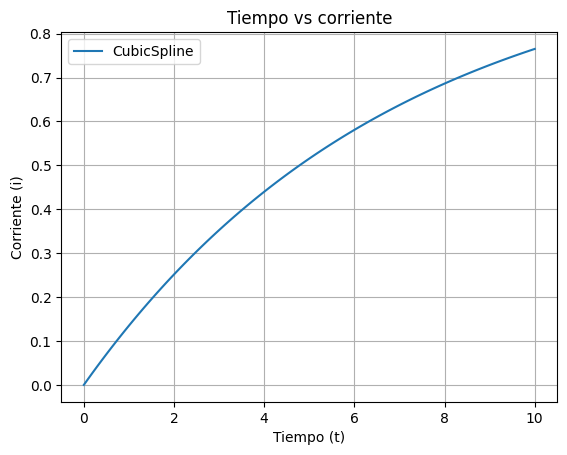

In [ ]:
#Hagamos la interpolación para aproximar la función
interpolacion = CubicSpline(df['tiempo'],df['Corriente'])
dominio = np.linspace(np.min(df['tiempo']),np.max(df['tiempo']),100)
funcionEvaluada = interpolacion(dominio)
fig = plt.figure()
plt.plot(dominio,funcionEvaluada,label='CubicSpline')
plt.xlabel('Tiempo (t)')
plt.ylabel('Corriente (i)')
plt.title('Tiempo vs corriente')
plt.grid()
plt.legend()
plt.show();

<ipython-input-4-d5a72511cddb>:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivadas = derivative(interpolacion,df['tiempo'],1e-06)


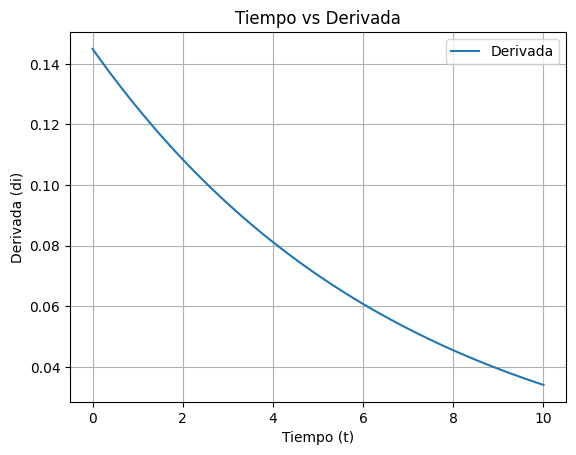

In [ ]:
#Hallemos la derivada de la función interpolada
derivadas = derivative(interpolacion,df['tiempo'],1e-06)
fig = plt.figure()
plt.plot(dominio,derivadas,label='Derivada')
plt.xlabel('Tiempo (t)')
plt.ylabel('Derivada (di)')
plt.title('Tiempo vs Derivada')
plt.grid()
plt.legend()
plt.show();

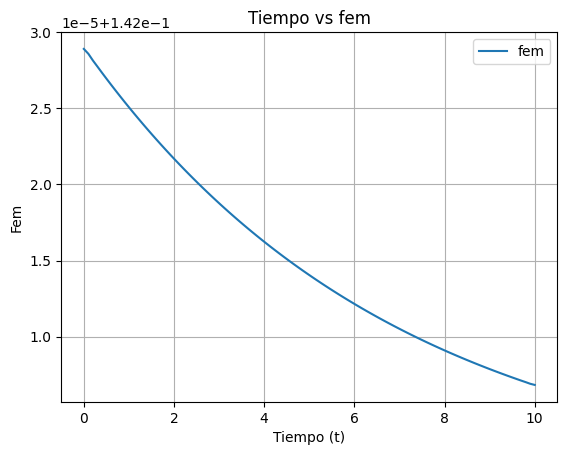

In [ ]:
L = 0.98
R = 0.142
df['fem'] =  L*derivadas + R*df['Corriente']
plt.plot(dominio,df['fem'],label='fem')
plt.xlabel('Tiempo (t)')
plt.ylabel('Fem')
plt.title('Tiempo vs fem')
plt.grid()
plt.legend()
plt.show();

<ipython-input-6-ea08abcb6db9>:29: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivadas = derivative(interpolacion,df['tiempo'],1e-06)


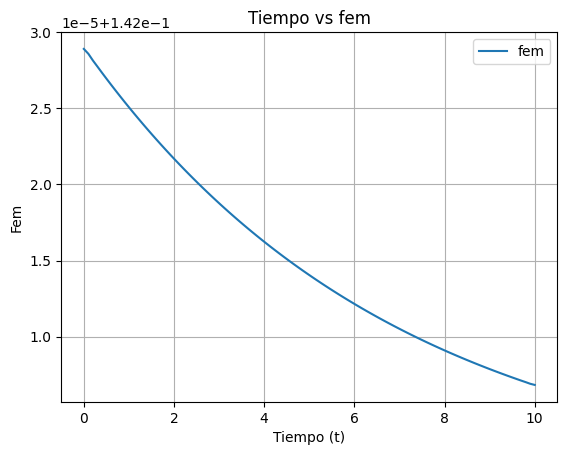

In [ ]:
#Vamos a modular el programa para que quede como un ejecutable.
#Importamos las librerías necesarias
import numpy as np
import pandas as pd
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from scipy.misc import derivative
#Creamos la función para leer los datos.

def read_file(path,select):
  if select == 'csv':
    try:
      df = pd.read_csv(url)
    except:
      print('El archivo csv no se leyó correctamente')
  elif select == 'xlsx':
    try:
      df = pd.read_excel(path)
    except:
      print('El archivo xslx no se leyó correctamente')
  else:
    print('Seleccione el tipo de archivo csv o xlsx')
    df = None
  return df

#Ahora hacemos una función para que encuentre la derivada de la función interpolada con los datos leídos.
def derivada(df):
  interpolacion = CubicSpline(df['tiempo'],df['Corriente'])
  derivadas = derivative(interpolacion,df['tiempo'],1e-06)
  return derivadas

#El output es el método que nos entrega los datos
def output(df,derivadas):
  L = 0.98
  R = 0.142
  df['fem'] =  L*derivadas + R*df['Corriente']
  dominio = np.linspace(np.min(df['tiempo']),np.max(df['tiempo']),100)
  plt.plot(dominio,df['fem'],label='fem')
  plt.xlabel('Tiempo (t)')
  plt.ylabel('Fem')
  plt.title('Tiempo vs fem')
  plt.grid()
  plt.legend()
  plt.show();
  #falta guardarlo.
  return df

def main():
   path = 'https://raw.githubusercontent.com/hernansalinas/autogrades/main/Laboratorios_Taller/dataset/corrienteVstiempo'
   df = read_file(path,'csv')
   derivadas = derivada(df)
   output(df,derivadas)
  #falta guardarlo.

if __name__ == "__main__":
    main()







# Parte 2

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

\begin{equation}
  \int_{a}^{b} f(x) \cdot dx \approx \frac{h}{2}[f(a)+ 2
\sum_{i=1}^{n-1} f(x_{i})+f(b)]
\end{equation}
con $h = \frac{b-a}{N}$

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson


\begin{equation}
  \int_{a}^{b} f(x) \cdot dx \approx \frac{h}{3}[f(a)+ 4(fx_1)+2f(x_2)+4f(x_3)+...+2f(x_{n-2})+4f(x_{n-1})+f(b)
\end{equation}
con $h = \frac{b-a}{N}$




3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

\begin{equation}
  \int_{a}^{b} f(x) \cdot dx \approx
\sum_{i=1}^{n} w_if(x_i)
\end{equation}

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

<!-- 
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$  -->


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

<!-- 
- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$ -->

<!-- 
- 
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$ -->


garantizando  que el error sea menor a $\varepsilon=1E-5$.  

Optimization terminated successfully.
         Current function value: -2.000000
         Iterations: 2
         Function evaluations: 29
[2.71379983e-09]
el n que necesitamos es: [129.09944487]
La primera integral por trapecio da: 0.26394350785499254


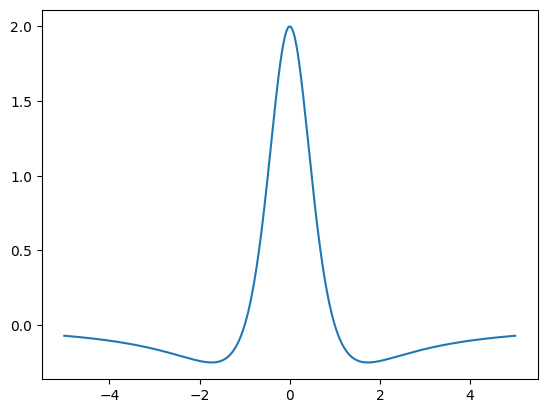

In [ ]:
#@title Integral de prueba para encontrar un n que nos garantize un epsilon
x = sp.symbols('x')
funcionlog = lambda x: sp.log(1+x**2)
a_ = -5
b_ = 5
E = 1E-5
dominiox = np.linspace(a_,b_,1000)
segundaDerivada = sp.diff(funcionlog(x),x,2)
derivadaNumpy = sp.lambdify(x, segundaDerivada,'numpy')
derivadaNegativa = sp.lambdify(x, -segundaDerivada,'numpy')

plt.plot(dominiox,derivadaNumpy(dominiox))
#Calculemos el mínimo del negativo de la función para hallar el máximo
a = 0
b = 1
maximo = optimize.fmin_powell(derivadaNegativa,0.1,ftol=1E-7)
print(maximo)
n = np.sqrt(((b-a)**3*derivadaNumpy(maximo))/(12*E))
print(f'el n que necesitamos es: {n}')

#Integremos
n = 12909
funcionlog1 = lambda x_: np.log(1+x_**2)
dominio1 = np.linspace(0,1,n)
y1 = funcionlog1(dominio1)
integralLogTrapecio = trapz(y1, dominio1)
print(f'La primera integral por trapecio da: {integralLogTrapecio}')

##Primera Función 
$$
\int_0^\frac{\pi}{2} \frac{1}{\sqrt\tan(x)}\\
$$

Calculemos el mínimo valor de N para un error de $1E-5$

###Método Del Trapecio

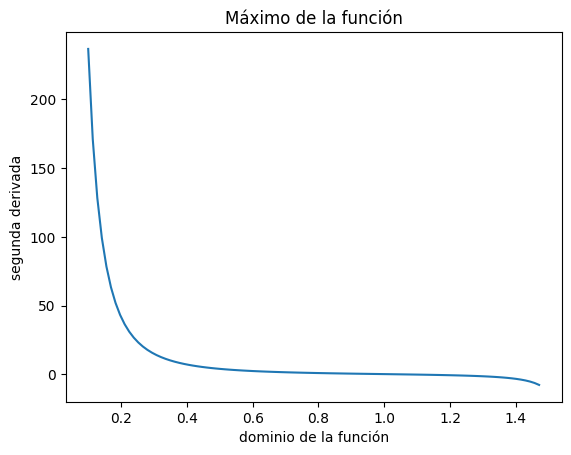

In [ ]:
#Primero vamos a calcular la segunda derivada.
x = sp.symbols('x')
tangenteSympy = lambda x: 1/sp.sqrt(sp.tan(x))
segundaDerivada = sp.diff(tangenteSympy(x),x,2)
derivadaNumpy = sp.lambdify(x,segundaDerivada,'numpy')
derivadaNegativa1 = sp.lambdify(x,-segundaDerivada,'numpy')
#Gráfica de la segunda derivada
#Graficamos para tener una idea de cómo se comporta el máximo
epsilon = 1e-9
domx = np.linspace(0.1,(np.pi/2)-0.1,100)
plt.plot(domx,derivadaNumpy(domx))
plt.xlabel('dominio de la función') 
plt.ylabel('segunda derivada')
plt.title('Máximo de la función');

En este caso como no hay un máximo muy bien definido no podemos asegurar que el error sea menor que un epsilon.

In [ ]:
#Consideramos el primer punto como el máximo.
#Ahora calculemos el error de la integral por el método del trapecio.
a = 0
b = np.pi/2
E = 1E-5
maximo1 = derivadaNumpy(domx[0])
n1 = np.sqrt((((b-a)**3)*abs(maximo1))/(12*abs(E)))
print(f'El valor mínimo de n sería {n1}')
print('Como no nos sirve este método para este caso, vamos a usar un valor diferente')

El valor mínimo de n sería 2765.3571459400027
Como no nos sirve este método para este caso, vamos a usar un valor diferente


Calculamos la integral mediante trapecio

In [ ]:
a = 0
b = np.pi/2
E = 1E-5
N = 10000000
funcion1 = lambda x_: (1)/(np.sqrt(np.tan(x_)))
dominio1 = np.linspace(0,np.pi/2,N)[1:-1]
y1 = funcion1(dominio1)
integral1Trapecio = trapz(y1, dominio1,dx=0.000001)
print(f'La primera integral por trapecio da: {round(integral1Trapecio,5)}')

La primera integral por trapecio da: 2.22066


###Método De Simpson

Calculemos el valor de N para obtener el error deseado.

In [ ]:
x = sp.symbols('x')
cuartaDerivada1 = sp.diff(tangenteSympy(x),x,4)
cuartaDerivada1N = sp.lambdify(x,cuartaDerivada1,'numpy')
cuartaDerivada1Negativa = sp.lambdify(x,-cuartaDerivada1,'numpy')
maximo1 = optimize.fmin_powell(cuartaDerivada1Negativa,0.1,ftol=1e-7)
n1 = (((b - a)**5*abs(maximo1)) / (180 * abs(E))) ** (1/4)

In [ ]:
print(f'El valor de n para el método de Simpson es: {n1}')

El valor de n para el método de Simpson es: [7.13699775]


In [ ]:
N= int(n1)
dominio1 = np.linspace(0,np.pi/2,N)[1:-1]
y1 = funcion1(dominio1)
integral1Simpson = simpson(y1,dominio1,dx=0.000001)
print(f'La primera integral por Simpson si usamos este n: {round(integral1Simpson,5)}')
#Si usamos un número mayor
N=10000000
dominio1 = np.linspace(0,np.pi/2,N)[1:-1]
y1 = funcion1(dominio1)
print(f'Con un n mucho mayor: {round(simpson(y1,dominio1,dx=0.000001),5)}')


La primera integral por Simpson si usamos este n: 1.11292
Con un n mucho mayor: 2.22065


###Método De Cuadratura

In [ ]:
integral1Cuadratura = quad(funcion1,min(dominio1),max(dominio1))
print(f'La primera integral por cuadratura es: {round(integral1Cuadratura[0],5)}')
print(f'El error es: {integral1Cuadratura[1]}')

La primera integral por cuadratura es: 2.22065
El error es: 1.257528258234506e-08


##Segunda Función
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$

###Como tenemos un intervalo infinito, vamos a realizar una prueba para determinar el valor óptimo que escogeremos como infinito, en donde la función converja

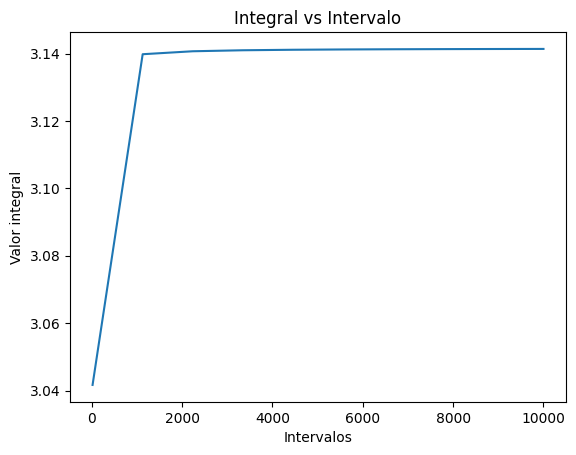

In [ ]:
##############################
funcion2 = lambda x_: (1)/(1+x_**2)
dominio2 = np.linspace(-1000,1000,1000)
##################################
#Posibles valores que serán nuestro infinito
a = np.linspace(20,10000,10)
#Creamos un array con las integrales
area = []
for a_ in a:
  x = np.linspace(-a_,a_,100000)
  area.append(trapz(funcion2(x),x))
plt.plot(a, np.array(area));
plt.title('Integral vs Intervalo')
plt.ylabel('Valor integral')
plt.xlabel('Intervalos');

De la gráfica anterior vemos que un valor por encima de 1000 nos aproxima bastante bien el valor de la integral.
Escogeremos un intervalo entre (-10000,10000)

###Método del trapecio

Calculemos el N para fijar un error de $1E-5$

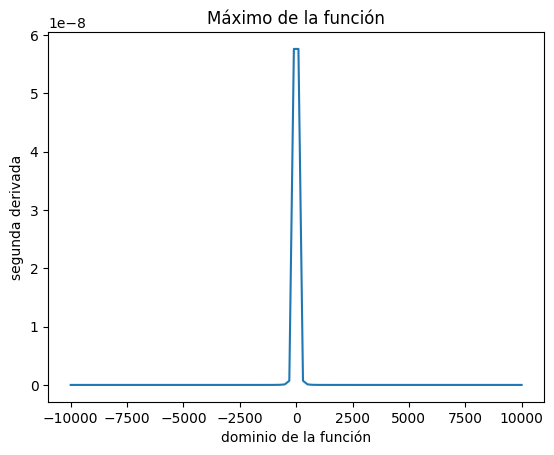

In [ ]:
#Primero vamos a calcular la segunda derivada.
a = -10000
b = 10000
x = sp.symbols('x')
segundaFuncionSympy = lambda x: (1)/(1+x**2)
segundaDerivada2 = sp.diff(segundaFuncionSympy(x),x,2)
derivadaNumpy2 = sp.lambdify(x,segundaDerivada2,'numpy')
derivadaNegativa2 = sp.lambdify(x, -segundaDerivada2,'numpy')

#Gráfica de la segunda derivada
#Graficamos para tener una idea de cómo se comporta el máximo
dominio2 = np.linspace(a,b,100)
plt.plot(dominio2,derivadaNumpy2(dominio2))
plt.xlabel('dominio de la función')
plt.ylabel('segunda derivada')
plt.title('Máximo de la función');

Con esta representación gráfica pasamos a hallar el máximo de la función

In [ ]:
#Calculemos el mínimo del negativo de la función para hallar el máximo
maximo2 = optimize.fmin_powell(derivadaNegativa2,0.1,ftol=1E-5)
print(f'El máximo de la función es: {maximo2}')
#Procedemos a hallar la cantidad de trapecios que necesitamos para asegurar el error
E = 1E-5
n2 = np.sqrt((((b-a)**3)*derivadaNumpy2(maximo2))/(12*E))
print(f'el n que necesitamos es: {n2}')

Optimization terminated successfully.
         Current function value: -0.500000
         Iterations: 2
         Function evaluations: 33
El máximo de la función es: [0.99999999]
el n que necesitamos es: [1.82574186e+08]


In [ ]:
#Calculemos el mínimo del negativo de la función para hallar el máximo
maximo2 = optimize.fmin_powell(derivadaNegativa2,0.1,ftol=1E-5)
print(f'El máximo de la función es: {maximo2}')
#Procedemos a hallar la cantidad de trapecios que necesitamos para asegurar el error
E = 1E-5
n2 = (b-a)/np.sqrt(6*E)
print(f'el n que necesitamos es: {n2}')

Optimization terminated successfully.
         Current function value: -0.500000
         Iterations: 2
         Function evaluations: 33
El máximo de la función es: [0.99999999]
el n que necesitamos es: 2581988.897471611


In [ ]:
N = int(n2)
dominio2 = np.linspace(-100000,100000,N)
y2 = funcion2(dominio2)
integral2Trapecio = trapz(y2,dominio2)
print(f'La segunda integral por trapecio da: {integral2Trapecio}')

La segunda integral por trapecio da: 3.1415726535897837


###Método De Simpson

###Método De Cuadratura

##Tercera Función

In [ ]:
#Tercera Función
#N = 10
#dominiox = np.linspace(0,np.pi/4,N)
#dominioy = np.linspace(np.cos(dominiox),np.)

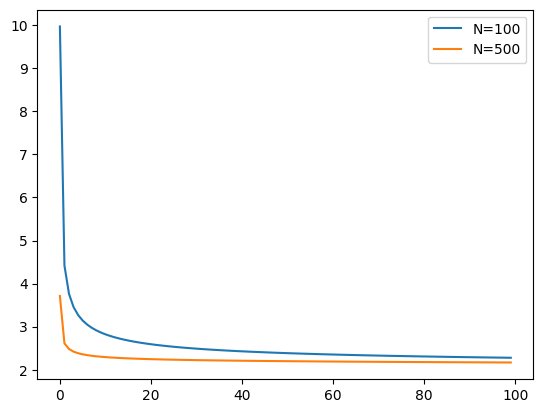

In [ ]:
#Esto es para definir el mejor epsilon????
epsilon = 1e-4
#Usar decoradores para vectorizar
@np.vectorize
def integral_trap(N,epsilon):
  x = np.linspace(0+epsilon,(np.pi/2)-epsilon,N)
  area = trapz(funcion1(x), x)
  return area

ep = np.linspace(1e-6,1e-3,100)
t1 = integral_trap(100,ep)
t2 = integral_trap(500,ep)
plt.plot(t1,label='N=100')
plt.plot(t2,label='N=500')
plt.legend();

5. The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integralevaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m) 
\end{equation}



$m_1 = 1-m$, 

$ 0 \le m \le1 $

$\epsilon(m)\leq 3\times 10^{-5}$



$a_0 = 1.3862944$

$b_0 = 0.5$

$a_1 = 0.1119723$

$b_1 = 0.1213478$

$a_2 = 0.00725296$

$b_2 = 0.0288729$

6. Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where 

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r



<!-- 7. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all
resistance except gravity is neglected, the escape velocity v is given by

$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity -->


7 Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:

\begin{equation}
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
\end{equation}

\begin{equation}
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
\end{equation}

7.2. Compute the relative error $\epsilon=|numerical-exact|/exact$ in each case. Present your data in the tabular form 
with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160

| N  |$\epsilon_T$ | $\epsilon_S$ | $\epsilon_G$ |
|----|---------------|--------------|--------------|
|   2  |...|...|...|
|   10  |...|...|...|

7.3. Make a log-log plot of relative errore versus. You should observe that 
$\epsilon\approx CN^{\alpha}$, $\mathrm{log} \epsilon =\alpha \mathrm{log}N + \mathrm{constant}$. This mean that a power-law dependence appears as a straight line on a log-log plot, and that if you use $\log_{10}$, the the ordinate on your log-log plot will be the negative of the numver of decimal places of presicion in your calculation.
7.4. Use your plot or table to stimate the power-law dependence of the error $\epsilon$ on the number of points N and to determine the number of decimal places of presicion in your calculation. Do this for both the trapezoid and simpsons rules and for both the algolrithmic and round-off error regimes. (Note that if may be hard to reach the round-off error regime for the trapezoid rule becasue the aproximation ) error is so large

In [ ]:
#@title Funciones
N = 10000
#Primera Función
funcion1 = lambda x: (1)/(np.sqrt(np.tan(x)))
dominio1 = np.linspace(0,np.pi/2,N)[1:-1]

#Segunda Función
funcion2 = lambda x: (1)/(1+x**2)
dominio2 = np.linspace(-1000,1000,N)
#Tercera Función
función3 = lambda x,y: (2*y*np.sin(x)+np.cos(x)**2)
dominio3 = np.linspace(0,np.pi/4,N)